# Ánalisis y modelo de predicción sobre dataset de diabetes

Realizado por Manuel Romero (mrm8488@gmail.com)

### Importamos las liberías necesarias para cargar y manipular el dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.externals import joblib

In [3]:
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
#Renombramos los nombres de las columnas (nombres en español)
df_diabetes.rename(columns={'Pregnancies': 'Embarazos', 'Glucose': 'Glucosa', 'BloodPressure': 'PresionSangre', 'SkinThickness': 'EspesorPiel', 'Insulin': 'Insulina', 'BMI': 'IMC', 'DiabetesPedigreeFunction': 'FuncionPedrigriDiabetes', 'Age': 'Edad', 'Outcome': 'Resultado' }, inplace=True)
df_diabetes.tail()

,Embarazos,Glucosa,PresionSangre,EspesorPiel,Insulina,IMC,FuncionPedrigriDiabetes,Edad,Resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Significado de cada columna

- Embarazos: Número de veces embarazada
- Glucosa: concentración plasmática de glucosa durante 2 horas en una prueba oral de tolerancia a la glucosa
- PresionSangre: presión arterial diastólica (mm Hg)
- EspesorPiel: espesor del pliegue de la piel del tríceps (mm)
- Insulina: insulina sérica de 2 horas (mu U / ml)
- IMC: índice de masa corporal (peso en kg / (altura en m) 2)
- FuncionPedrigriDiabetes: función de pedigrí de la diabetes (una función que puntúa la probabilidad de diabetes según el historial familiar)
- Edad: Edad (años)
- Resultado: variable de clase (0 si no es diabético, 1 si es diabético)

In [8]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Embarazos                  768 non-null int64
Glucosa                    768 non-null int64
BloodPressure              768 non-null int64
EspesorPiel                768 non-null int64
Insulina                   768 non-null int64
IMC                        768 non-null float64
FuncionPedrigriDiabetes    768 non-null float64
Edad                       768 non-null int64
Resultado                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df_diabetes.describe()

,Embarazos,Glucosa,BloodPressure,EspesorPiel,Insulina,IMC,FuncionPedrigriDiabetes,Edad,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualicemos la relación entre las variables

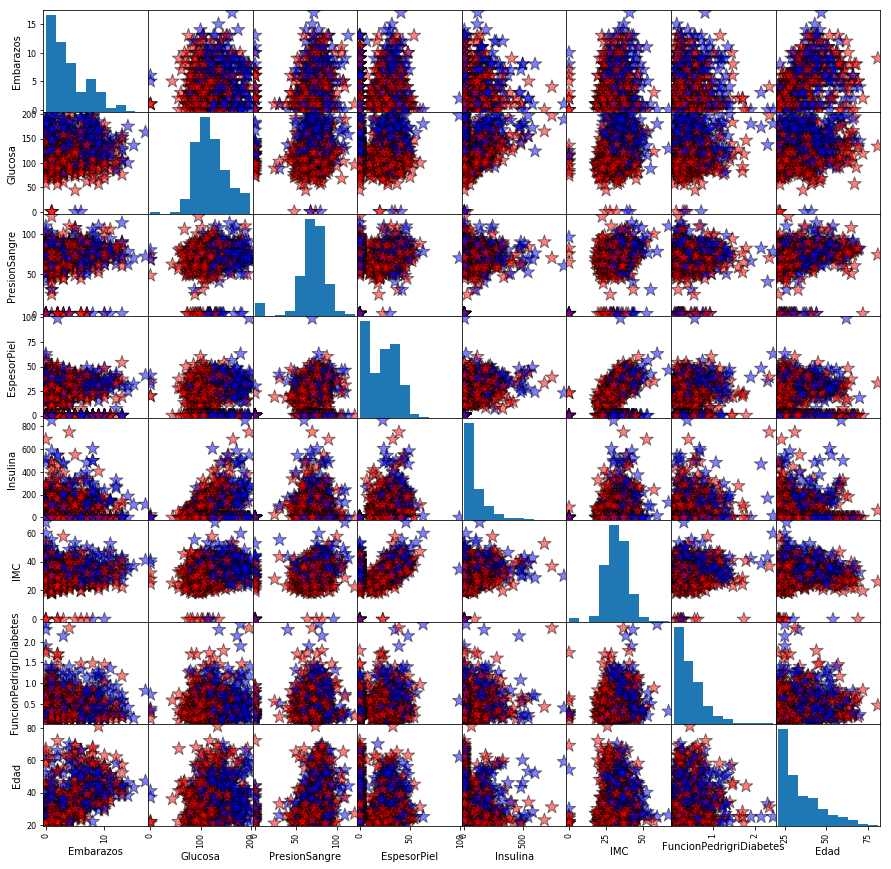

In [15]:
color_list = ['red' if i==0 else 'blue' for i in df_diabetes.loc[:,'Resultado']]
pd.plotting.scatter_matrix(df_diabetes.loc[:, df_diabetes.columns != 'Resultado'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()


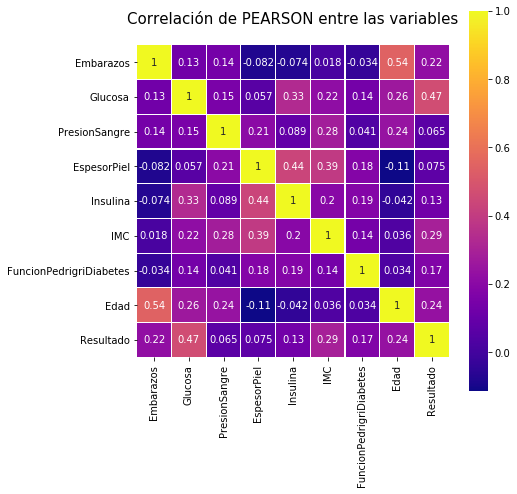

In [16]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
A = df_diabetes.drop("Resultado", axis=1)
B = df_diabetes["Resultado"]
le = LabelEncoder()
le.fit(B)
B = le.transform(B)
df_1 = A
df_1['Resultado'] = B
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlación de PEARSON entre las variables', y=1.05, size=15)
sns.heatmap(df_1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

Vemos que existe una relación lineal positiva entre la variable a predecir (Resultado) y las variables predictoras, especialmente entre los niveles de glucosa y el IMC. Por otro lado, la varible que nos informa sobre la presión sanguínea apenas tiene relación con el Resultado. (ver última fila de la matiz)

0    500
1    268
Name: Resultado, dtype: int64

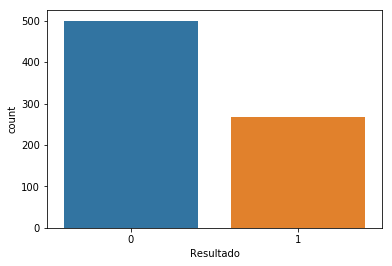

In [18]:
sns.countplot(x="Resultado", data=df_diabetes)
df_diabetes.loc[:,'Resultado'].value_counts()

Vemos que hay 500 casos de personas que no tienen diabetes vs 268 de personas que sí tiene. Por lo tanto, la precición no será la mejor medida de evaluación de nuestro modelo

### Elaboremos modelos de predicción utilizando diferentes algoritmos

División del dataset en conjuntos de entrenamiento y test y escalado de éstos

In [42]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x,y = df_diabetes.loc[:,df_diabetes.columns != 'Resultado'], df_diabetes.loc[:,'Resultado']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y ,test_size = 0.3,random_state = 1)

Escalemos los datos

In [43]:
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


1) KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('Con KNN (K=3) la precisión es: ',knn.score(x_test,y_test)) # accuracy

Con KNN (K=3) la precisión es:  0.7705627705627706


1.1) Ajuste del hiperparámetro k

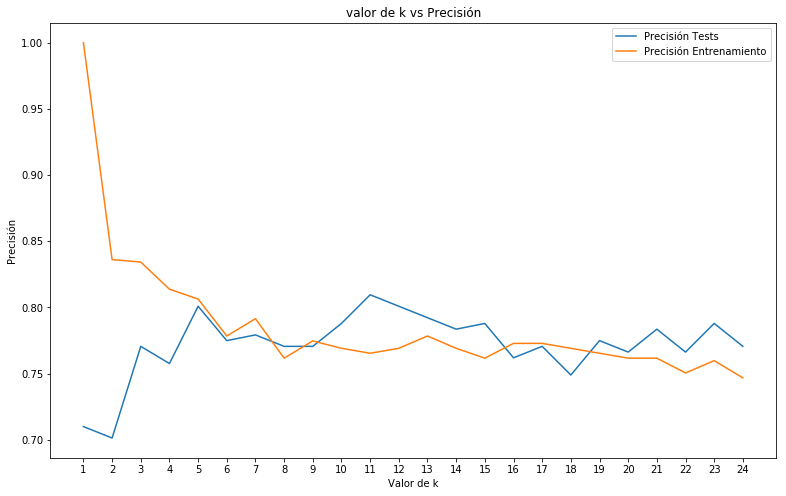

La mejor precisión es 0.8095238095238095 y se da con K = 11


In [45]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Precisión Tests')
plt.plot(neig, train_accuracy, label = 'Precisión Entrenamiento')
plt.legend()
plt.title('valor de k vs Precisión')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(neig)
plt.show()
print("La mejor precisión es {} y se da con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [31]:
from sklearn.metrics import confusion_matrix, f1_score
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
cm = confusion_matrix(y_test, prediction)
f1 = f1_score(y_test, prediction)
print("Veamos la matriz de confusión:")
print(cm)
print()
print("Veamos la medida f1-score del modelo (media ponderada entre precision and recall):")
print(f1)

Veamos la matriz de confusión:
[[138   8]
 [ 40  45]]

Veamos la medida f1-score del modelo (media ponderada entre precision and recall):
0.6521739130434784


La medida f1-score es más apropiada para evaluar el rendimiento de nuestro modelo ya que la muestra no está balanceada (hay bastantes más casos de personas sin diabetes que con diabetes)

2) Regresión logística

In [50]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
prediction = knn.predict(x_test)
f1 = f1_score(y_test, prediction)
print('la precisión es: ',lr.score(x_test,y_test)) # accuracy
print('f1-score es: ', f1)

la precisión es:  0.7835497835497836
f1-score es:  0.6074074074074074


3) Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(x_train, y_train)
prediction = rf_clf.predict(x_test)
f1 = f1_score(y_test, prediction)
print('la precisión es: ',lr.score(x_test,y_test)) # accuracy
print('f1-score es: ', f1)

la precisión es:  0.7835497835497836
f1-score es:  0.3047619047619048


### Interpretemos alguno de los modelos

Text(0.5,0,'Importancia')

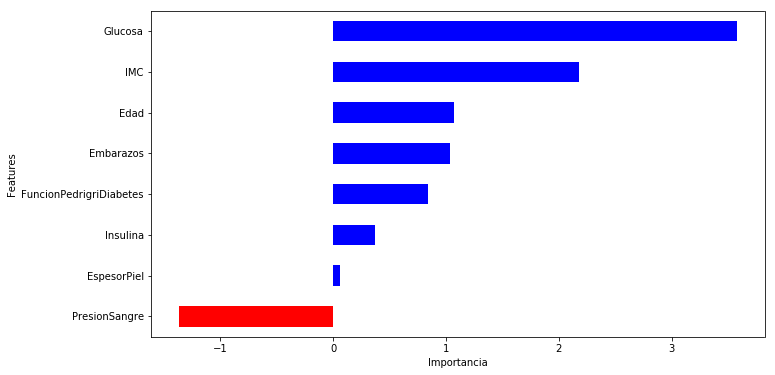

In [57]:
coeff = list(lr_clf.coef_[0])
labels = list(df_diabetes.drop('Resultado',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importancia')

Aquí podemos visualizar el peso que el modelo da a las variables a la hora de tomar decisiones. Como vemos coincide con nuestras observaciones en el apartado de **visualización** anterior.

### Almacenamiento y recuperación del modelo creado

In [60]:
joblib.dump(lr_clf, 'diabeteseModel.pkl')
diabetesLoadedModel = joblib.load('diabeteseModel.pkl')